$\newcommand{\xv}{\mathbf{x}}
 \newcommand{\wv}{\mathbf{w}}
 \newcommand{\yv}{\mathbf{y}}
 \newcommand{\zv}{\mathbf{z}}
 \newcommand{\Chi}{\mathcal{X}}
 \newcommand{\R}{\rm I\!R}
 \newcommand{\sign}{\text{sign}}
 \newcommand{\Tm}{\mathbf{T}}
 \newcommand{\Xm}{\mathbf{X}}
 \newcommand{\Zm}{\mathbf{Z}}
 \newcommand{\Wm}{\mathbf{W}}
 \newcommand{\Ym}{\mathbf{Y}}
 \newcommand{\I}{\mathbf{I}}
 \newcommand{\muv}{\boldsymbol\mu}
 \newcommand{\Sigmav}{\boldsymbol\Sigma}
$



# Tensorflow 101

# What is Tensorflow
TensorFlow is a  numerical computation library that assists users with building, training, and testing machine learning models. TensorFlow got its name because the inputs into models are tensors which then flow through a list of operations. This "list" of operations can be visualized as a graph or a flowchart.

## Computational Graphs
TensorFlow uses a graph framework as eluded to before. Each graph constructed by TensorFlow is made up of operations referred to as **op**. Each node in the graph is an op called an **op node**. Each op node is connected to other op nodes which then forms a graph. The graph can be thought of as an outline for the path an input Tensor will follow. As a general note, an op takes tensors as input and produces tensors as output.


Internally, a kind of just-in-time (JIT) compiler extracts the computation graph(s) from the Python code. The extracted graph is optimized by pruning unused nodes, and then runs efficiently by automatically running independent operations in parallel.  

In general, TensorFlow uses graphs to define the training and testing computations needed to build a model. TensorFlow even has a neat library called TensorBoard that let's visualize these graphs!

![](https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Feasy-tensorflow.com%2Ffiles%2F2_6.png&f=1&nofb=1)


## What is a Tensor?
A tensor can be conceptualized as a generalization for matrix, vector, or a scalar. This means a tensor can take the form of a scalar, 1-D matrix, or any N-D matrix. For now, it is okay to conceptualize a matrix and tensor as the same idea. However, outside machine and deep learning this isn't true. There is more nuance in the differences between matrices and tensors but the aforementioned definition should suffice for now.

> Tensor: In the general case, an array of numbers arranged on a regular grid with a variable number of axes is known as a tensor.
> <br> -- p.31 *Deep Learning* by Ian Goodfellow

![](https://miro.medium.com/max/449/1*kHues3bfBOythrXNLosesQ.png)

### Tensor Rank
All tensors have a rank which describes the total number of dimensions. For instance, if we had a tensor with the shape (3, 3) then we would say this tensor has a rank of 2, since there are 2 dimensions.
 
> rank 0: 3 <br/>
> rank 1: [1,2,3] <br/>
> rank 2: [[1,2],[2,3]] <br/>
> rank 3: [[[1,2,3],[2,3,4]],[[1,1,1],[2,2,2]]] <br/>
> ...
 
## Extra Material
### Readings
- [What’s the difference between a matrix and a tensor?](https://medium.com/@quantumsteinke/whats-the-difference-between-a-matrix-and-a-tensor-4505fbdc576c)
- [Tensors Illustrated](https://hackernoon.com/learning-ai-if-you-suck-at-math-p4-tensors-illustrated-with-cats-27f0002c9b32)
- [GeeksforGeeks - TensorFlow 2.0](https://www.geeksforgeeks.org/tensorflow-2-0/)

### Videos
- [Tensors Explained - Data Structures of Deep Learning](https://www.youtube.com/watch?v=Csa5R12jYRg)
- [What's a Tensor (technical)](https://www.youtube.com/watch?v=f5liqUk0ZTw)
  

# Installation

Make sure install TensorFlow before starting this lab. You can follow the instructions from 
https://www.tensorflow.org/install/. Once you have finished installing, you can import TensorFlow as follows. Assertion here checks if your installation is TensorFlow v2.0 or above. If you are failing the assertion here then your TensroFlow version is most likely below v2.0!

In [1]:
import sys
assert sys.version_info >= (3, 5)

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0" # check if your ensorflow version is above 2.0

In [2]:
# Tools from text for consistant results

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


# Exploring Tensors
Let's start off by exploring how to create some simple tensors. You'll come to notice that there are some parallels between TensorFlow's tensors syntax and Numpy's array syntax. This is on purpose and we'll see more compatibilities between tensors and arrays later. 

First, let's start off by defining a scalar tensor constant called `node1`. A `tf.constant` means exactly what you might expect, we can not change the value of this constant once defined. If we want to define a tensor that can be changed we use `tf.Variable`. Notice, we can define the data type for the constant using the 'dtype' parameter. [Here](https://www.tensorflow.org/api_docs/python/tf/dtypes/DType) is the documentation on all the different data types TensorFlow supports.

If you're curious about `tf.constant` or `tf.Variable` then uncomment the following lines to see their documentation.

In [3]:
# ?tf.constant

In [4]:
# ?tf.Variable

In [5]:
node1 = tf.constant(3.0, dtype=tf.float32)
print('node1:', node1)

node1: tf.Tensor(3.0, shape=(), dtype=float32)


When we print our `node1` variable TensorFlow automatically prints some useful information. This being the data, shape, and type. **Note, you might get slightly different output if you let Jupyter print instead of using Python's `print()` function.**

Let's define our second scalar constant `node2`. Notice that TensorFlow will automatically assign types. In this case, it will automatically assign float32 to our `node2` tensor because the numbers we initialized with had decimals.

In [6]:
node2 = tf.constant(4.0) 
print('node2:', node2)

node2: tf.Tensor(4.0, shape=(), dtype=float32)


Now, instead of defining constant scalars we can define two constant vectors. Here, our `nodeb` defaults to a data type of int32 because no decimals were used when initializing.

In [7]:
nodea = tf.constant([1,2,3], dtype=tf.float32)
nodeb = tf.constant([4,5,6]) # defaults to tf.int32
print('nodea:', nodea)
print('nodeb:', nodeb)

nodea: tf.Tensor([1. 2. 3.], shape=(3,), dtype=float32)
nodeb: tf.Tensor([4 5 6], shape=(3,), dtype=int32)


Finally let's define two 2-D constant tensor.

In [8]:
nodeA = tf.constant([[1,2,3], [1,2,3]], dtype=tf.float32)
nodeB = tf.constant([[4,5,6], [4,5,6]]) # defaults to tf.int32
print('nodeA:', nodeA)
print('nodeB:', nodeB)

nodeA: tf.Tensor(
[[1. 2. 3.]
 [1. 2. 3.]], shape=(2, 3), dtype=float32)
nodeB: tf.Tensor(
[[4 5 6]
 [4 5 6]], shape=(2, 3), dtype=int32)


Now let's compare all our shapes and data types. Just like in Numpy, we can check our the shape our tensor by using the `.shape()` method. Likewise, we can check the data type by using the `.dtype()` method.

In [9]:
print('node1 shape:', node1.shape)
print('nodeb shape:', nodeb.shape)
print('nodeB shape:', nodeB.shape)

node1 shape: ()
nodeb shape: (3,)
nodeB shape: (2, 3)


In [10]:
print('node1 shape:', node1.dtype)
print('nodeb shape:', nodeb.dtype)
print('nodeB shape:', nodeB.dtype)

node1 shape: <dtype: 'float32'>
nodeb shape: <dtype: 'int32'>
nodeB shape: <dtype: 'int32'>


Finally, if we want to convert our tensor to a NumPy array we simply call the `.numpy()` method.

In [11]:
print("node1:", node1.numpy())
print("nodeb:", nodeb.numpy()) 
print("nodeB:\n", nodeB.numpy())

node1: 3.0
nodeb: [4 5 6]
nodeB:
 [[4 5 6]
 [4 5 6]]


# Creating a Graph

Now that we know how to define tensors, let's compute a simple graph by adding two of our previously defined tensors together! Below is an example of what the graph might look like. Here we can imagine the const3 and const4 nodes representing two of our previously defined tensors. Both the const3 and const4 nodes point to the add node indicating an add operation is applied.

![](https://www.tensorflow.org/images/getting_started_add.png)

Let's first start off by adding `node1` and `node2` together. Notice, that both of these tensors are of the same type. Meaning, both `node1` and `node2` have a data type of float32!

In [12]:
print(node1 + node2)

tf.Tensor(7.0, shape=(), dtype=float32)


Here we can see our two nodes were added together and our tensor now has the value of 7!

What happens if we try adding tensors of different types? Let's see by wrapping our addition operation of our 1-D tensors `nodea` and `nodeb` in a try except.

In [13]:
try:
    nodea + nodeb
except tf.errors.InvalidArgumentError as ex:
    print(ex)

cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a int32 tensor [Op:AddV2] name: add/


As expected we caught an error that indicates to us that we can't add two tensors of different data types. To fix this we can cast `nodea` as an int32 by using the `tf.cast()` function.

In [14]:
print('nodea before casting:', nodea)
print('nodea after casting:', tf.cast(nodea, tf.int32))

nodea before casting: tf.Tensor([1. 2. 3.], shape=(3,), dtype=float32)
nodea after casting: tf.Tensor([1 2 3], shape=(3,), dtype=int32)


Now when we try adding our casted `nodea` our addition operation works flawlessly.

In [15]:
print(tf.cast(nodea, tf.int32) + nodeb)

tf.Tensor([5 7 9], shape=(3,), dtype=int32)


Let's add our two 2-D tensors together. Recall, that `nodeB` is an int32 so we must cast it as a float32 or we must cast `nodeA` as an int32. Let's try adding `nodeA` and `nodeB` while casting `nodeB` as a float32.

In [16]:
nodeC = nodeA + tf.cast(nodeB, tf.float32)
print(nodeC)

tf.Tensor(
[[5. 7. 9.]
 [5. 7. 9.]], shape=(2, 3), dtype=float32)


### Indexing

Just like with Numpy arrays we can slice and index tensors. This done exactly like we are used to doing with Numpy. Let's slice the second column out of `nodeC`.

In [17]:
nodeC[:, 1]

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([7., 7.], dtype=float32)>

### TODO:
Notice our shape when slicing out the second column is (2,)! As most of you may know by now, working with a single dimension vector can produce weird results later on down the line. Let's splice the second column from `nodeC` tensor, but this time lets make sure it's a matrix with the shape (2, 1).

1. Try slicing second column of `nodeC` so that the resulting output is a (2, 1) matrix. 
    1. Try using `tf.reshape()`, `tf.expand_dims()`, or slicing the array and adding `tf.newaxis` or `None` to the 3rd dimension.


In [18]:
# TODO (1)
column_matrix = 
if (2,1) != column_matrix.shape:
    raise ValueError("Your sliced matrix does not have the shape (2, 1)")

# NumPy and TensorFlow
TensorFlow went through great lengths to allow for relatively seamless transitions between NumPy arrays and TensorFlow tensors. Let's take a closer look at some of these transitions. We'll start off by defining a NumPy array `array`.

In [19]:
array = np.arange(4)
array

array([0, 1, 2, 3])

Now let's convert `array` to TensorFlow tensor `tensor`. 

In [20]:
tensor = tf.constant(array)
tensor

<tf.Tensor: shape=(4,), dtype=int64, numpy=array([0, 1, 2, 3])>

Can we convert it back to NumPy array? We can by calling `.numpy()` as mentioned before

In [21]:
tensor.numpy()

array([0, 1, 2, 3])

We can also can simply cast our tensor using the `np.array()` function.

In [22]:
np.array(tensor)

array([0, 1, 2, 3])

It turns out TensorFlow and NumPy functions will **typically** automatically account for the conversion between tensors and arrays for you. For instance, we can feed NumPy arrays to TensorFlow functions. Likewise, we can feed tensors to NumPy functions.

Here we pass a NumPy array to the TenorFlow `tf.square()` function. As we can see the function works fine which returns a tensor.

In [23]:
tf.square(array)  # passing numpy array to tensorflow

<tf.Tensor: shape=(4,), dtype=int64, numpy=array([0, 1, 4, 9])>

Likewise, here we pass a tensor to the NumPy `np.square()` function which returns a NumPy array.

In [24]:
np.square(tensor)  # passing tf tensor

array([0, 1, 4, 9])

# Primitives 
Other than NumPy arrays TensorFlow supports several other primitives. We'll quickly go through some of other primitive types tensors support in this section.

### Strings

Tensors can represent more than just numerical values. Here we can set a tensor equal to a string.

### TODO:

1. Create a string tensor by passing the string "Hello, world!" to `tf.constant()`.

In [25]:
# TODO (1)
string_tensor = 
print(string_tensor)

tf.Tensor(b'Hello, world!', shape=(), dtype=string)


In [26]:
# Convert string to unicode
string = "Hello, world!"
[ord(ch) for ch in string]

# Load unicode into tensor
unicode_tensor = tf.strings.unicode_decode(string, "UTF-8")
print(unicode_tensor)

tf.Tensor([ 72 101 108 108 111  44  32 119 111 114 108 100  33], shape=(13,), dtype=int32)


In [27]:
string_tensor = tf.strings.unicode_encode(unicode_tensor, "UTF-8")
print(string_tensor)

tf.Tensor(b'Hello, world!', shape=(), dtype=string)


### Ragged Tensors

A ragged tensor is a kind of tensors allows the elements to have variable lengths. Let's take a look at this idea using string tensors. 

In [28]:
string_tensor = tf.constant(['hello', 'world!', 'itcs4156'])
print(string_tensor)

tf.Tensor([b'hello' b'world!' b'itcs4156'], shape=(3,), dtype=string)


When we convert the string elements into unicode, it will be a ragged tensor as it has variable length integer arrays.  

In [29]:
tf.strings.length(string_tensor, unit="UTF8_CHAR")

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([5, 6, 8], dtype=int32)>

In [30]:
ragged_tensor = tf.strings.unicode_decode(string_tensor, "UTF-8")
ragged_tensor

<tf.RaggedTensor [[104, 101, 108, 108, 111], [119, 111, 114, 108, 100, 33], [105, 116, 99, 115, 52, 49, 53, 54]]>

Notice how the shape of our ragged tensor is (3, None). The 3 indicates that we have 3 elements and the 'None' indicates each element can have variable length.

In [31]:
ragged_tensor.shape

TensorShape([3, None])

### TODO:

1. Now create a RaggedTensor by passing the following lists `[1,2,3]`, `[1]`, and `[1,2,3,4,5]`  to `tf.ragged.constant()`.
    1. Hint: Be sure to wrap the all the aforementioned lists into one list before passing them to `tf.ragged.constant()`. In other words, create a list of lists as the input to `tf.ragged.constant()`.

In [32]:
# TODO (1)
ragged_tensor = 
print(ragged_tensor)
print(ragged_tensor.shape)

<tf.RaggedTensor [[1, 2, 3], [1], [1, 2, 3, 4, 5]]>
(3, None)


What if I need a fixed-sized tensor. You can use `.to_tensor()` to convert the ragged to the regular. Notice, that the 'None' becomes the size of the largest list in our tensor, i.e. 5.

In [33]:
tensor = ragged_tensor.to_tensor()
print(tensor)
print(tensor.shape)

tf.Tensor(
[[1 2 3 0 0]
 [1 0 0 0 0]
 [1 2 3 4 5]], shape=(3, 5), dtype=int32)
(3, 5)


### Sparse Tensors

Imagine you have a very large matrix but most of the elements are zeros. For instance, try to imagine a matrix with hundreds of dimensions and millions elements in each dimension, but only 2% of all the elements are actually nonzero. Storing a sparse matrix like this in memory and be extremely expensive. Luckily, TensorFlow has the `tf.SparseTensor` class that can save us a lot of memory.

Below is a toy example of a sparse array where the nonzero elements are all 1s.

In [34]:
sparse_array = np.zeros((8, 8))
sparse_array[(1, 1), (2, 5)] = 1
sparse_array

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

### TODO:
1. Convert the sparse Numpy array `sparse_array` into a tensor using the `tf.constant()` function. Store output into `tensor`.

In [35]:
# TODO (1)
tensor = 
print(tensor)

tf.Tensor(
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]], shape=(8, 8), dtype=float64)


We can convert our sparse tensor into a special `SparseTensor` object, which will save us memory for large sparse tensors. To do so, we simply need to know the indices and the values for all the nonzero elements.

In [36]:
sparse_tensor = tf.SparseTensor(indices=[(1, 2), (1, 5)], values=[1,1], dense_shape=[8,8])
print(sparse_tensor)

SparseTensor(indices=tf.Tensor(
[[1 2]
 [1 5]], shape=(2, 2), dtype=int64), values=tf.Tensor([1 1], shape=(2,), dtype=int32), dense_shape=tf.Tensor([8 8], shape=(2,), dtype=int64))


### TODO:

For comparison, let's turn our `sparse_tensor` back into a regular tensor. 

1. Turn `sparse_tensor` back into a regular tensor by passing our `sparse_tensor` to `tf.sparse.to_dense()`. Store the output into `dense_tensor`.

In [37]:
# TODO (1)
dense_tensor = 
print(dense_tensor)

tf.Tensor(
[[0 0 0 0 0 0 0 0]
 [0 0 1 0 0 1 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]], shape=(8, 8), dtype=int32)


## Variables

Practice so far has been with `tf.constant`. Let's experiement using `tf.Variable` so that we can reassign the values in our tensor. This will be needed as our weights will need to be updated as we train our models. 

### TODO:

1. Create a 1-D tensor using `tf.Variable` and pass `a` as the initial values. Store the output into `v`.
2. Change the value 2 in our tensor `v` to be 5.
    1. Determine the index position of 2 and then use the `.assign()` method on `v`, indexed at the position of 2, to then assign 5.
3. Change all the values in `v` to be twice as large, i.e. v*2.

In [38]:
a = [1, 2, 3]
# TODO (1)
v = 
print(v)

<tf.Variable 'Variable:0' shape=(3,) dtype=int32, numpy=array([1, 2, 3], dtype=int32)>


In [39]:
# TODO (2)

print(v)

<tf.Variable 'Variable:0' shape=(3,) dtype=int32, numpy=array([1, 5, 3], dtype=int32)>


In [40]:
# TODO (3)

print(v)

<tf.Variable 'Variable:0' shape=(3,) dtype=int32, numpy=array([ 2, 10,  6], dtype=int32)>


# Linear Regression
Now let's put TensorFlow into action! First let's start off by doing some simple linear regression using the famous California Housing dataset. The goal of this dataset is to predict housing prices. There is no need to download anything as we can load this dataset using `sklearn`.

> The California Housing Prices data contains information from the 1990 California census. So although it may not help you with predicting current housing prices like the Zillow Zestimate dataset, it does provide an accessible introductory dataset for teaching people about the basics of machine learning.
Recall the linear regression closed form formulas are as follows.


### Data Loading 

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.datasets import fetch_california_housing

%matplotlib inline

Here we load the dataset which is a `sklearn` specific class called a `Bunch` object. Then we extract the data from the `Bunch` object to a NumPy array, and then finally cast our NumPy array as a Pandas DataFrame.

In [42]:
# Load housing dataset Bunch object
housing = fetch_california_housing()

# Concat and cast data as array
X_T = np.c_[housing.data, housing.target]

# Cast data as DataFrame
df = pd.DataFrame(X_T)
df.describe()

# Add an extra feature name for target visualization
df.columns = housing.feature_names + ['Avg. Value']

### Visualization
For a quick data visualization we compute a correlation matrix using Pandas DataFrame `.corr()` method and then plot it using a heatmap. Here we can see negative and positive correlations between our data features based on the color of each element. For instance, we can see latitude and longitude have a strong negative correlation as the color bar indicates to us that the correlation value is around -1.

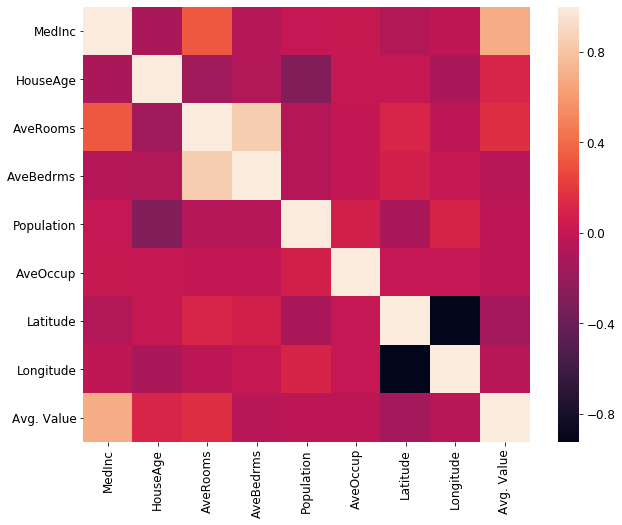

In [43]:
corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr)

### Partition
Do you remember the `partitionlib.py` Python file for data partitioning we a few weeks ago? Well, it's time to reuse it! Let's copy the `partitionlib.py` Python file into the directory where this notebook is running! If you don't have this file go to the [Files](https://uncc.instructure.com/courses/119993/files?preview=8006250) tab in Canvas to download the `partitionlib.py` Python file. 

In [44]:
import partitionlib as ptl

In [45]:
import importlib
import partitionlib
importlib.reload(partitionlib);

In [46]:
def partition_data(X, T):
    """Partition data into train and test splits."""
    data, targets = ptl.partition(X, T)
    Xtrain, Xtest = data
    Ttrain, Ttest = targets
    return Xtrain, Xtest, Ttrain, Ttest

In [47]:
# Partition data
Xtrain, Xtest, Ttrain, Ttest = partition_data(housing.data, housing.target)
print("Train data shape: {}".format(Xtrain.shape))
print("Train target shape: {}".format(Ttrain.shape))
print("Test data shape: {}".format(Xtest.shape))
print("Test target shape: {}".format(Ttest.shape))

Train data shape: (16512, 8)
Train target shape: (16512, 1)
Test data shape: (4128, 8)
Test target shape: (4128, 1)


In [48]:
# Save total number of features
D = Xtrain.shape[1]
# Save number of samples for train/trest
Ntrain, Ntest = Xtrain.shape[0], Xtest.shape[0]
print("Number of total features: {}".format(D))
print("Number of training samples: {}".format(Ntrain))
print("Number of testing samples: {}".format(Ntest))

Number of total features: 8
Number of training samples: 16512
Number of testing samples: 4128


### Standardization

Next we can standardize our data using the`StandardScaler` class from `sklearn`. Don't forget, we have to readd our bias column to our newly standardized data.

In [49]:
# Let's normalize the data first with Scikit.learn
from sklearn.preprocessing import StandardScaler

# Define standardization class and standardize our housing data
scaler = StandardScaler()
XtrainS = scaler.fit_transform(Xtrain)
XtestS = scaler.fit_transform(Xtest)

# Add bias to standardized data
X1trainS = np.c_[np.ones((Ntrain, 1)), XtrainS]
X1testS = np.c_[np.ones((Ntest, 1)), XtestS]

# Least Squares
Recall the following least squares closed form equation.
$$
\Wm = (\Xm^\top \Xm)^{-1} \Xm^\top \Tm
$$

Below is the NumPy code that we would typically use to compute least squares.

In [50]:
T = housing.target.reshape(-1, 1)
w = np.linalg.lstsq(X1trainS.T @ X1trainS, X1trainS.T @ Ttrain)[0]

print('Learned Weights: {}'.format(w))
print("MSE: {}".format(np.mean((X1trainS @ w - Ttrain)**2)))

Learned Weights: [[ 2.07084113]
 [ 0.83862817]
 [ 0.11381035]
 [-0.27812104]
 [ 0.30519044]
 [-0.00217071]
 [-0.0450531 ]
 [-0.895343  ]
 [-0.87121145]]
MSE: 0.5236257645685504


/home/ben/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


### TODO:
Let's rewrite our Numpy code using TensorFlow.
1. Cast our standardized training data with bias added `X1trainS` as a tensor by passing it to the `tf.constant()` function. Store the output inside  `Xt`.
2. Cast our target `Ttrain` as a tensor passing it to the `tf.constant()` function. Store the output inside `Tt`.
3. Using `tf.linalg.lstsq()` and `tf.matmul()` compute the weights. Store the output into `w`.
    1. Hint: `tf.matmul()` replaces the dot product, i.e. the `@` symbol for NumPy arrays.
    2. Hint: Use the closed form LS equation above.

In [51]:
# TODO (1)
Xt = 
Xt

<tf.Tensor: shape=(16512, 9), dtype=float64, numpy=
array([[ 1.00000000e+00, -2.44107037e-02, -1.40695934e+00, ...,
        -3.34506573e-02,  1.11764313e+00, -3.66200446e-01],
       [ 1.00000000e+00, -9.17555535e-01, -4.50649581e-01, ...,
        -1.14682117e-01, -1.34822737e+00,  1.21952671e+00],
       [ 1.00000000e+00,  6.62124076e-01,  1.07197775e-01, ...,
        -1.77470305e-02,  1.11764313e+00, -8.79816474e-01],
       ...,
       [ 1.00000000e+00, -1.54850649e-02, -1.24757438e+00, ...,
         1.53353197e-02,  9.25801215e-01, -6.80353939e-01],
       [ 1.00000000e+00,  2.19063820e-01,  8.24430091e-01, ...,
        -7.32401133e-02, -7.58664407e-01,  5.56313779e-01],
       [ 1.00000000e+00, -3.68074202e-01, -9.28804458e-01, ...,
         1.43409391e-04,  8.74331432e-01, -1.22887591e+00]])>

In [52]:
# TODO (2)
Tt = 
Tt

<tf.Tensor: shape=(16512, 1), dtype=float64, numpy=
array([[1.397],
       [1.35 ],
       [1.338],
       ...,
       [1.293],
       [2.972],
       [1.563]])>

In [53]:
# TODO (3)
w = 
w

<tf.Tensor: shape=(9, 1), dtype=float64, numpy=
array([[ 2.07084113],
       [ 0.83862817],
       [ 0.11381035],
       [-0.27812104],
       [ 0.30519044],
       [-0.00217071],
       [-0.0450531 ],
       [-0.895343  ],
       [-0.87121145]])>

In [54]:
print('Learned Weights: {}'.format(w))
print("MSE: {}".format(np.mean((Xt @ w - Tt)**2)))

Learned Weights: [[ 2.07084113]
 [ 0.83862817]
 [ 0.11381035]
 [-0.27812104]
 [ 0.30519044]
 [-0.00217071]
 [-0.0450531 ]
 [-0.895343  ]
 [-0.87121145]]
MSE: 0.5236257645685505


# Least Mean Squares and Gradient Descent 

Now, let's implement LMS with TensorFlow. Instead of computing each sample gradient one at a time, like normal, we'll compute all the gradients at once. To account for this, we must divide by our total number of training  samples $n$.

Recall computing the gradient for a single sample (i.e. the derivative of our MSE loss function) is as follows.

$\nabla E_k = 2 *  x_k^T \cdot( x_k \cdot w - t_k)$

Thus, if we want to compute all gradients at once our equation simply becomes the following.

$\nabla E = \frac{2}{n} * X^T \cdot (X \cdot w  - T)$

To compute our weight update recall we use the following formula.

$w = w - \alpha * \nabla E$

Here $\alpha$ is our learning rate and $\nabla E$ contains the gradients for for all the training data samples.

### TODO:

1. Compute the gradient for all our samples by taking the dot product between our data `Xt` and our error stored in `error`. Here `tf.matmul()` will replace of the dot product. In addition, use `tf.transpose()` to transpose any matrices.
    1. Hint: Here $X$ corresponds to `Xt`, $T$ corresponds to `Tt`, $n$ corresponds to `Ntrain`, and $w$ corresponds to `w`. 
    1. Hint: Recall the the shape of `error` is (16512, 1) and the shape of `Xt` is (16512, 9).
2. Using the weight update above, update our weights `w` using the tensor method `.assign()` instead of the equals.
    1. Hint:  Here $w$ corresponds to `w`, $\alpha$ corresponds to `learning_rate`, and $\nabla E$ corresponds `gradients`   

In [55]:
n_epochs = 1000
learning_rate = 0.01

# Cast our training data as tensors
Xt = tf.constant(X1trainS, dtype=tf.float32)
Tt = tf.constant(Ttrain, dtype=tf.float32)

# Notice we use tf.Variable which works just like tf.constant but 
# now we can change the value of the tensor using w.assign().
w = tf.Variable(tf.random.uniform([D + 1, 1], -1.0, 1.0, seed=42), name="w")

print("Randomly initialized weights: {}".format(w))
for epoch in range(n_epochs):
    Yt = tf.matmul(Xt, w, name="predictions")
    error = Yt - Tt
    # Compute the loss function
    mse = tf.reduce_mean(tf.square(error), name="mse")
    # TODO (1): Compute the gradient of the loss function
    gradients = 
    # TODO (2): Update weights given gradients
    w.assign()
    
    if epoch % 100 == 0:
        print("Epoch", epoch, "MSE = {}".format(mse))

print(w)        

Randomly initialized weights: <tf.Variable 'w:0' shape=(9, 1) dtype=float32, numpy=
array([[ 0.9045429 ],
       [ 0.35481548],
       [ 0.5906365 ],
       [ 0.51156354],
       [-0.04808879],
       [ 0.26202965],
       [-0.62795925],
       [-0.7713845 ],
       [-0.32755637]], dtype=float32)>
Epoch 0 MSE = 2.760789394378662
Epoch 100 MSE = 0.6347358822822571
Epoch 200 MSE = 0.5738407969474792
Epoch 300 MSE = 0.5587007999420166
Epoch 400 MSE = 0.5487741231918335
Epoch 500 MSE = 0.5417068600654602
Epoch 600 MSE = 0.5366416573524475
Epoch 700 MSE = 0.533007025718689
Epoch 800 MSE = 0.5303969383239746
Epoch 900 MSE = 0.5285208225250244
<tf.Variable 'w:0' shape=(9, 1) dtype=float32, numpy=
array([[ 2.0708354 ],
       [ 0.7820405 ],
       [ 0.12636475],
       [-0.13397652],
       [ 0.16903265],
       [ 0.00398427],
       [-0.04428319],
       [-0.86153054],
       [-0.8288295 ]], dtype=float32)>


# Autograd
Instead of manually computing the gradients, TensorFlow can actually do it for us. To do so, we have to use`tf.GradientTape()` which records the operations used during a specified block of code. The recorded operations are then used to compute the automatic differentiation. Let's start by stepping through what is happening with the below code.

`with tf.GradientTape() as tape:
      <code block>
`

The above line uses a Python [with statement](https://www.python.org/dev/peps/pep-0343/) in conjunction with `tf.GradientTape()`. Essentially, this line aliases `tf.GradientTape()` to `tape` and activates `tf.GradientTape()` to track operations **only** within the proceeding code block (represented by `<code block>`). The `<code block>` is replaced with the MSE calculation code below. 

`
Yt = tf.matmul(Xt, w, name="predictions")
error = Yt - Tt
loss = tf.reduce_mean(tf.square(error), name="mse")
`

Here we calculate all the necessary variables to compute our MSE loss function (predictions and error). In doing so `tf.GradientTape()` can track all the appropriate variables and operations in order to compute the gradient of our loss function.

Now, when we call `tape.gradient(loss, w)`,outside the `tf.GradientTape` code block, TensorFlow will automatically compute our gradients. Our gradients are calculated based on our loss function `loss` with respect to our trainable variable weights `w`. FYI, when you call `tape.gradient()`, the recorded tape will be automatically erased. If you call `tape.gradient()` twice, it will throw an exception!

Finally, our weight update `w.assign(w - learning_rate * gradients)` is exactly the same as before.

### References
- [Intro to tf.GradientTape](https://medium.com/analytics-vidhya/tf-gradienttape-explained-for-keras-users-cc3f06276f22)
- [TensorFlow automatic differentiation](https://www.tensorflow.org/tutorials/customization/autodiff)

In [56]:
n_epochs = 1000
learning_rate = 0.01

# Cast our training data as tensors
Xt = tf.constant(X1trainS, dtype=tf.float32)
Tt = tf.constant(Ttrain, dtype=tf.float32)

# Notice we use tf.Variable which works just like tf.constant but 
# now we can change the value of the tensor using w.assign().
w = tf.Variable(tf.random.uniform([D + 1, 1], -1.0, 1.0, seed=42), name="w")

print(w)
for epoch in range(n_epochs):

    with tf.GradientTape() as tape:
        Yt = tf.matmul(Xt, w, name="predictions")
        error = Yt - Tt
        loss = tf.reduce_mean(tf.square(error), name="mse")

    gradients = tape.gradient(loss, w)
    w.assign(w - learning_rate * gradients)

    if epoch % 100 == 0:
        print("Epoch", epoch, "MSE = {}".format(loss))

print(w)

<tf.Variable 'w:0' shape=(9, 1) dtype=float32, numpy=
array([[-0.12018752],
       [-0.39934063],
       [ 0.33478546],
       [-0.25189137],
       [-0.753314  ],
       [ 0.3486998 ],
       [ 0.23956943],
       [ 0.8812921 ],
       [ 0.7901039 ]], dtype=float32)>
Epoch 0 MSE = 8.58199691772461
Epoch 100 MSE = 1.0080363750457764
Epoch 200 MSE = 0.8041122555732727
Epoch 300 MSE = 0.728164553642273
Epoch 400 MSE = 0.6742595434188843
Epoch 500 MSE = 0.6350277662277222
Epoch 600 MSE = 0.6063775420188904
Epoch 700 MSE = 0.5853891372680664
Epoch 800 MSE = 0.5699597597122192
Epoch 900 MSE = 0.5585735440254211
<tf.Variable 'w:0' shape=(9, 1) dtype=float32, numpy=
array([[ 2.0708354 ],
       [ 0.8786321 ],
       [ 0.17053525],
       [-0.26282772],
       [ 0.25052705],
       [ 0.01857397],
       [-0.05218828],
       [-0.43829185],
       [-0.4146419 ]], dtype=float32)>


# Making Predictions

So far we have only seen what training is like with "low-level" TensorFlow. So, how do we compute our predictions? It's simple! Just like before we want to take the dot product between our learned weights `w` and our test data `X1testS`.

### TODO:
1. Compute the predictions for our test data `X1testS` using the tensor version of our test data `Xt` and our learned weights `w`.
    1. Hint: Remember `tf.matmul()` is our dot product function for tensors.

In [57]:
def mse_loss(y, t):
    return tf.reduce_mean(tf.square(y-t), name="mse")

In [58]:
Xt = tf.constant(X1testS, dtype=tf.float32)
Tt = tf.constant(Ttest,  dtype=tf.float32)
# TODO (1)
y = 
print("MSE: {}".format(mse_loss(y, Tt)))

MSE: 0.5514115691184998


# Build a TensorFlow Keras Model

Now it's time to get into the high-level TensorFlow API. As of TensorFlow 2.0, TensorFlow has fully integrated a high-level API called Keras. Keras makes creating, training, and testing models easy and quick. Here we'll rewrite our linear model with Keras and start logging with TensorBoard Keras callback function. The logged information can later be visualized with TensorBoard which is a great tool for debugging and analysis.

### References:
- [TensorFlow Keras Tutorial](https://www.tensorflow.org/guide/keras)
- [Training and evaluating models with Keras](https://www.tensorflow.org/guide/keras/train_and_evaluate)
- [Keras Model Docs](https://www.tensorflow.org/api_docs/python/tf/keras/Model)
- [Keras Layers Docs](https://www.tensorflow.org/api_docs/python/tf/keras/layers)
- [Keras Metrics Docs](https://www.tensorflow.org/api_docs/python/tf/keras/metrics)
- [TensorBoard Tutorial](https://www.tensorflow.org/tensorboard/get_started)
- [Save and Load Models Docs](https://www.tensorflow.org/tutorials/keras/save_and_load)

Here we define our log file path that will be used by Keras to track our TensorFlow computational graph, loss, and any other variables we might specify. When we want to visualize the information in the this log file we will use TensorBoard!

In [59]:
from datetime import datetime

now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
root_logdir = "tf_logs"
logdir = "{}/run-{}/".format(root_logdir, now)
logdir

'tf_logs/run-20200317171351/'

Now it is time to build our model. Here is what is happening in the model building code below.

`
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1)
])
`

The above line declares a very basic model using Keras `Sequential` class, which doesn't require you to implement your own model class (unlike implementations shown on the Keras [model docs](https://www.tensorflow.org/api_docs/python/tf/keras/Model)).  We create a fully connected layer, i.e. a hidden layer, using `tf.keras.layers.Dense()`. By creating only one layer and giving this layer only one hidden unit we are essentially creating a linear regression model! There are other layer types that Keras provides and you can even implement your own. The Keras [layer docs](https://www.tensorflow.org/api_docs/python/tf/keras/layers) provide a comprehensive list of all the implemented layers.

`
model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=0.001))
`

When we are ready to build our model we call the `.compile()` method. When calling this method we have to pass the type of loss we want to use and the type of optimizer (these can be strings or objects). In our case we are using MSE as our loss and stochastic gradient decent as our optimizer with a .001 learning rate. Additionally, we can pass other metrics that will automatically be tracked for us. The Keras [metric docs](https://www.tensorflow.org/api_docs/python/tf/keras/metrics) provide a list of the metrics you can pass. There are other parameters to pass as well so check out the [model docs](https://www.tensorflow.org/api_docs/python/tf/keras/Model) to see what else you can do. 

`tensorboard_cb = tf.keras.callbacks.TensorBoard(logdir)`

Lastly, we initialize a Keras TensorBoard callback so we can visualize our graph and variables later on with TensorBoard. This callback essentially alerts Keras to take care of all the TensorBoard tracking for us and will be passed as a callback parameter when we use `.fit()`.

In [60]:
# Build network structure
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1)
])

# Build model with loss and optimizer 
model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=0.001))

# Create a tensorboard callback for keras so we can visualize our graph and variables later with tensorboard later
tensorboard_cb = tf.keras.callbacks.TensorBoard(logdir)

Once our model is compiled it's time to train our model using the `.fit()` method. Here we need to pass our data and targets. We also have the option to pass other parameters, like the number of training epochs or Keras callbacks.

In [61]:
history = model.fit(X1trainS, Ttrain, epochs=30, callbacks=[tensorboard_cb])

Train on 16512 samples
Epoch 1/30
16512/16512 [==============================] - 0s 26us/sample - loss: 3.6557
Epoch 2/30
16512/16512 [==============================] - 0s 19us/sample - loss: 0.8955
Epoch 3/30
16512/16512 [==============================] - 0s 19us/sample - loss: 0.6937
Epoch 4/30
16512/16512 [==============================] - 0s 20us/sample - loss: 0.6439
Epoch 5/30
16512/16512 [==============================] - 0s 20us/sample - loss: 0.6200
Epoch 6/30
16512/16512 [==============================] - 0s 20us/sample - loss: 0.6034
Epoch 7/30
16512/16512 [==============================] - 0s 20us/sample - loss: 0.5907
Epoch 8/30
16512/16512 [==============================] - 0s 20us/sample - loss: 0.5799
Epoch 9/30
16512/16512 [==============================] - 0s 19us/sample - loss: 0.5711
Epoch 10/30
16512/16512 [==============================] - 0s 19us/sample - loss: 0.5637
Epoch 11/30
16512/16512 [==============================] - 0s 18us/sample - loss: 0.5574
Epoch 1

The `.fit()` method returns a `Histroy` object which tracks parameters, loss, metrics and other specified stats. For instance, we can see all stats that were tracked by using `history.history.keys()`. In our case, our only key is 'loss'. Thus, we can only view the history of our loss for each epoch.

In [62]:
history.history.keys()

dict_keys(['loss'])

In [63]:
history.history['loss']

[3.6556750716165056,
 0.8955351624262425,
 0.6936791785234628,
 0.6438602163752382,
 0.6200437917150268,
 0.6033585683781971,
 0.590692140277504,
 0.5799468215121779,
 0.5710935985683933,
 0.5636743671845558,
 0.557428067651137,
 0.5522487776050734,
 0.5478149893325429,
 0.5441364530733851,
 0.5409962070831494,
 0.5386274226240871,
 0.5362597447495128,
 0.5346140348922837,
 0.5330358995774458,
 0.5317792033906593,
 0.5307304124788258,
 0.5297229994348315,
 0.5289229892136514,
 0.528545220635196,
 0.5278676256768463,
 0.5276472680270672,
 0.5269970900501854,
 0.5267061214287614,
 0.5262970242562682,
 0.5264100913218287]

Now, when we need to test our results we have two options. We can call `.predict()` that will return our predictions. We can also call `.evaluate()` that will return our loss and any metrics we passed to our model when we called `.compile()`.

In [64]:
y = model.predict(X1testS)
y

array([[1.8542817 ],
       [2.2435832 ],
       [0.85494673],
       ...,
       [1.5509338 ],
       [1.9913034 ],
       [0.8693051 ]], dtype=float32)

In [65]:
error = model.evaluate(X1testS, Ttest)
error

4128/4128 [==============================] - 0s 14us/sample - loss: 0.5267


0.5267296135425568

Finally, we can run TensorBoard using the `%load_ext tensorboard` and `%tensorboard` Jupyter Magics. Notice, we have to specify the log directory 'tf_logs/' that we created earlier. We also can specify the port. By default the port is set to 6006 so specifying it again is somewhat redundant here. 

When TensorBoard first starts it will default you to the 'SCALARS' main menu tab, which plots any of your tracked stats. You can view the computational graph by clicking on the 'GRAPHS' tab.

TensorBoard will by default load all the log files in the 'tf_logs/' directory. You can view all the loaded log files under 'Runs' where you can freely uncheck log files you don't want to display. If you want to read more on TensorBoard check out the [offical tutorial](https://www.tensorflow.org/tensorboard/get_started).

In [66]:
%load_ext tensorboard
%tensorboard --port 6006 --logdir tf_logs/

Reusing TensorBoard on port 6006 (pid 9711), started 2:58:13 ago. (Use '!kill 9711' to kill it.)